The ``skimage`` package provides connected component analysis functionalities for general n-dimensional binary arrays. It is most commonly used for 2D images, but quite conveniently it works for 3D masks as well.

In [1]:
import SimpleITK as sitk
from skimage.measure import label, regionprops
import numpy as np
from matplotlib import pyplot as plt

In [2]:
vessel_us = sitk.ReadImage('vess_us.nii.gz')

vessel_ct = sitk.ReadImage('vessel_ct.nii.gz')
o = [True,False,False] # The left-right order is different between the US image and CT image. We flip vessel_ct to make them consistent.
vessel_ct = sitk.Flip(vessel_ct,o)


In [3]:
masks = sitk.GetArrayFromImage(vessel_us)

In [4]:
masks.shape

(69, 1080, 500)

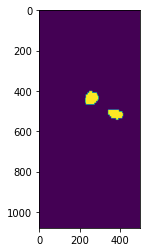

In [5]:
slice_mask = masks[20]
plt.imshow(slice_mask)

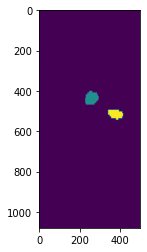

In [6]:
plt.imshow(label(slice_mask))

In [7]:
masks.shape

(69, 1080, 500)

In [12]:
import sys
sys.path.append('../../')
from scripts.USImageCV.utils.bunny import max_connected_area

_,out_mask = max_connected_area(masks,return_mask=True)
out_image = sitk.GetImageFromArray(out_mask)
out_image.SetSpacing(vessel_us.GetSpacing())

In [13]:
sitk.WriteImage(out_image,'vessel_us_cleaned.nii.gz') # Can visualize this in 3D slicer. Notice the noises are gone.